In [ ]:

class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

In [ ]:

class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'

In [ ]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.blackOdds, self.redOdds = 1.0, 1.0
        self.pocketOdds = len(self.pockets) - 1.0
    def spin(self):
        self.ball = random.choice(self.pockets)
    def isBlack(self):
        if type(self.ball) != int:
            return False
        if ((self.ball > 0 and self.ball <= 10)\
            or (self.ball>18 and self.ball<=28)):
            return self.ball%2 == 0
        else:
            return self.ball%2 == 1
    def isRed(self):
        return type(self.ball) == int and not self.isBlack()
    def betBlack(self, amt):
        if self.isBlack():
            return amt*self.blackOdds
        else: return -amt
    def betRed(self, amt):
        if self.isRed():
            return amt*self.redOdds
        else: return -amt*self.redOdds
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'


In [ ]:
def playRoulette(game, numSpins, toPrint = True):
    luckyNumber = '2'
    bet = 1
    totRed, totBlack, totPocket = 0.0, 0.0, 0.0
    for i in range(numSpins):
        game.spin()
        totRed += game.betRed(bet)
        totBlack += game.betBlack(bet)
        totPocket += game.betPocket(luckyNumber, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting red =',
              str(100*totRed/numSpins) + '%')
        print('Expected return betting black =', 
              str(100*totBlack/numSpins) + '%')
        print('Expected return betting', luckyNumber, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totRed/numSpins, totBlack/numSpins, totPocket/numSpins)


In [ ]:

def findPocketReturn(game, numTrials, trialSize, toPrint = False):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, toPrint)
        pocketReturns.append(trialVals[2])
    return pocketReturns
#

In [ ]:

#random.seed(0)
#numTrials = 50000
#numSpins = 200
#game = FairRoulette()
#
#means = []
#for i in range(numTrials):
#    means.append(findPocketReturn(game, 1, numSpins)[0]/numSpins)
#
#pylab.hist(means, bins = 19,
#           weights = pylab.array(len(means)*[1])/len(means))
#pylab.xlabel('Mean Return')
#pylab.ylabel('Probability')
#pylab.title('Expected Return Betting a Pocket')





In [ ]:
import random, pylab

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1

def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std



def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random() 
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color = color, label = legend,
               weights = pylab.array(len(means)*[1])/len(means),
               hatch = style)
    return getMeanAndStd(means)
 
mean, std = plotMeans(1, 1000000, 1000000, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 1000000, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend() 






[0.2 0.2 0.2 0.2 0.2]


(array([0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

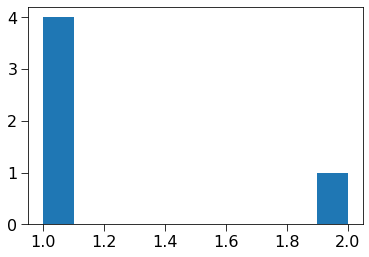

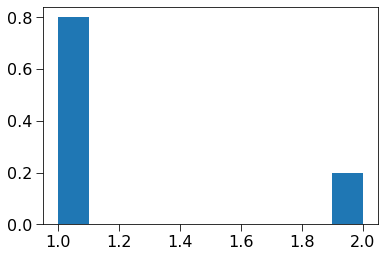

In [7]:
L = [1,1,1,1,2]
pylab.hist(L)
factor = pylab.array(len(L)*[1])/len(L)
print(factor)
pylab.figure()
pylab.hist(L, weights = factor)